# Project - Bank Churn Prediction

**Background and Context**

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Description**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

**Data Dictionary**
- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank - account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?

In [ ]:
# Libraries for data manipulation and graphing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

# Libraries for splitting data, scaling data and evaluating model with quantitative scores
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve

# Library to over sample the data in order to balance the target classes
from imblearn.over_sampling import SMOTE

# Displaying the graphs in the notebook and with better style
%matplotlib inline
sns.set(color_codes=True)

# Importing Data

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Defining the path of the dataset
project_path = '/content/drive/My Drive/AIML/6.0/Project/'
dataset_file = project_path + 'bank.csv'

In [ ]:
# Reading the dataset
dfBank = pd.read_csv(dataset_file, index_col=0)

# Overview of Dataset

In [ ]:
dfBank.head() # displaying the first 5 rows of data

CustomerId   Surname  ...  EstimatedSalary Exited
RowNumber                        ...                        
1            15634602  Hargrave  ...        101348.88      1
2            15647311      Hill  ...        112542.58      0
3            15619304      Onio  ...        113931.57      1
4            15701354      Boni  ...         93826.63      0
5            15737888  Mitchell  ...         79084.10      0

[5 rows x 13 columns]

In [ ]:
dfBank.tail() # displaying the last 5 rows of data

CustomerId    Surname  ...  EstimatedSalary Exited
RowNumber                         ...                        
9996         15606229   Obijiaku  ...         96270.64      0
9997         15569892  Johnstone  ...        101699.77      0
9998         15584532        Liu  ...         42085.58      1
9999         15682355  Sabbatini  ...         92888.52      1
10000        15628319     Walker  ...         38190.78      0

[5 rows x 13 columns]

In [ ]:
dfBank.shape

(10000, 13)

The dataset contains 10,000 customers and 13 columns.

## Checking for missing values and duplicates

In [ ]:
dfBank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
dfBank.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
dfBank["CustomerId"].duplicated().sum()

0

- There are no missing values but we will still need to check for values that do not make sense.
- There are no repeated customers.
- There are 13 columns to the dataset, however `CustomerId` and `Surname` will not provide us any useful information we can learn from so we will drop those columns.

In [ ]:
dfBank.drop(columns=["CustomerId", "Surname"], inplace=True)

In [ ]:
dfBank.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

- We have successfully dropped the two columns leaving only ten features and one target variable.

## Checking how balanced the target variable is.

In [ ]:
# Number of distinct categories or classes in target variable
dfBank["Exited"].nunique()

2

- There are only two classes in the target variable.

Let's check to see how balanced the target variable is.

In [ ]:
# Checking the percentage of each class in the dataset
dfBank["Exited"].value_counts(normalize=True) * 100

0    79.63
1    20.37
Name: Exited, dtype: float64

- Roughly 80% of the dataset is still with the bank as opposed to roughly 20% having left the bank.
- This shows us the dataset is not balanced equally between the two target classes.

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
dfBank.describe().T

count           mean  ...          75%        max
CreditScore      10000.0     650.528800  ...     718.0000     850.00
Age              10000.0      38.921800  ...      44.0000      92.00
Tenure           10000.0       5.012800  ...       7.0000      10.00
Balance          10000.0   76485.889288  ...  127644.2400  250898.09
NumOfProducts    10000.0       1.530200  ...       2.0000       4.00
HasCrCard        10000.0       0.705500  ...       1.0000       1.00
IsActiveMember   10000.0       0.515100  ...       1.0000       1.00
EstimatedSalary  10000.0  100090.239881  ...  149388.2475  199992.48
Exited           10000.0       0.203700  ...       0.0000       1.00

[9 rows x 8 columns]

- `CreditScore` is near perfectly symmetric with a mean and median virtually equal.
  - FICO credit scores range from 300 to 850.  This shows there is at least one customer with the maximum credit score possible.
  - No customers have the minimum credit score possible.
- Customer age is skewed slightly to the right.  All customers are adults.
- `Tenure`, the length of time a customer has been with the bank is symmetric with an equal mean and median.
  - The median tenure is five years with a maximum of ten years.
  - There are some new customers who have not been with the company for more than one year.
- `Balance` is skewed to the left with a median of about 97,000.
  - The standard deviation is 62,000 so the data has a large spread which tracks with real customer wealth.
  - There are customers with a balance of zero.
- More than half of customers have only one product with the bank.
  - This is heavily skewed to the right with a maximum of four products.
- The mean of `HasCrCard` shows that about 71% of customers have a credit card.
- The mean of `IsActiveMember` shows the bank views only 52% of their customers are "active members."
- `EstimatedSalary` is not skewed and has a mean of 100,000.
  - There is a customer with an income of 11.58.
- The mean of `Exited` shows 20% of the customers have left the bank.

In [ ]:
dfBank.describe(include="O").T

count unique     top  freq
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

- Half of the customers reside in France.
- Slightly more than half of the customers are male.

### Custom function to plot a histogram and a boxplot for a given feature.

In [ ]:
# Custom function for graphing histograms and boxplots for each feature
def histbox(feature, isCat=False):
    
    # Initializing two different graphs located side by side of one another
    fig, (box, hist, histHue) = plt.subplots(nrows=1, ncols=3, figsize=(22.5,5))
    
    mean = np.round(dfBank[feature].mean(), 2)
    median = np.round(dfBank[feature].median(), 2)
        
    # Boxplot of the given feature
    sns.boxplot(x=dfBank[feature], ax=box)
    
    # Displaying the mean and median of the feature on the graph
    box.axvline(x=mean, color="g", linestyle="dashed", label="mean: " + str(mean))
    box.axvline(x=median, color="r", linestyle="dashdot", label="median: " + str(median))
    box.legend() # Displaying the legend on the graph
    
    if isCat:
      # Histogram of the given feature
      sns.countplot(x=dfBank[feature], color='b', ax=hist)

    else:
      # Histogram of the given feature
      sns.histplot(x=dfBank[feature], kde=True, ax=hist)
    
    # Displaying the mean and median of the feature on the graph
    hist.axvline(x=mean, color="g", linestyle="dashed", label="mean: " + str(mean))
    hist.axvline(x=median, color="r", linestyle="dashdot", label="median: " + str(median))
    hist.legend() # Displaying the legend on the graph

    if isCat:
      tab = pd.crosstab(dfBank[feature], dfBank["Exited"], normalize="index")
      tab["ones"] = 1

      sns.barplot(x=tab.index, y=tab["ones"], color=sns.color_palette()[1])
      sns.barplot(x=tab.index, y=tab[0], color="b")

      # add legend
      top_bar = mpatches.Patch(color=sns.color_palette()[1], label="1")
      bottom_bar = mpatches.Patch(color='b', label="0")
      plt.legend(handles=[bottom_bar, top_bar], loc="upper right")
      plt.ylabel("Percent")
    
    else:
      # Histogram broken down vs Exited
      sns.histplot(x=dfBank[feature], hue=dfBank.Exited, kde=True, ax=histHue)

    plt.show()

### Observations of Credit Score

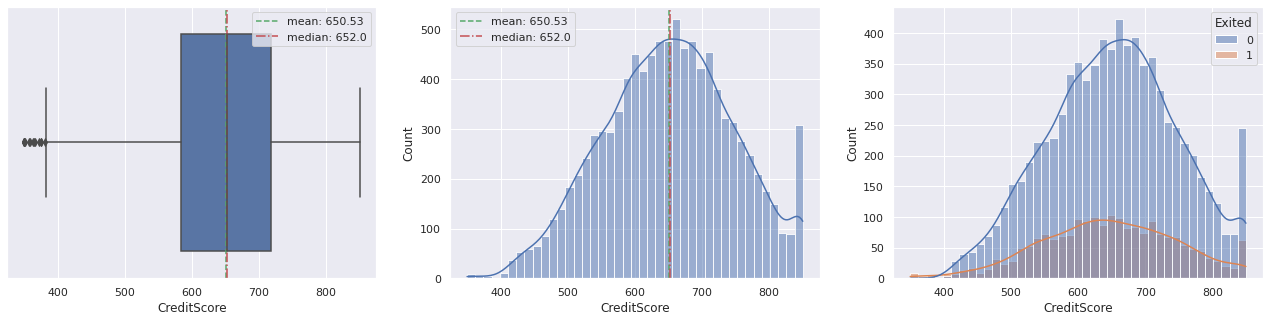

In [ ]:
histbox("CreditScore")

- Customers' credit scores are nearly symmetric in distribution.
- There are a number of customers at the maximum near 850.
- There are a few statistical outliers at the low end however we will not drop them because they are inside the FICO score range and none are at the actual minimum score.
- In 2020 the average FICO score in the U.S. was 710 so scores were either on average lower when this data was collected or this bank has a population with lower than average scores.
- Credit Score does not seem to affect whether or not a customer exits.

### Observations on Age

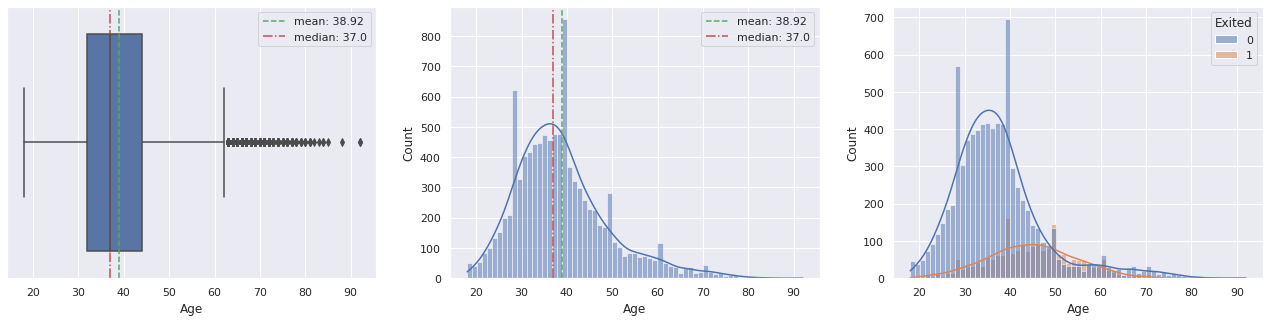

In [ ]:
histbox("Age")

- Customer age has the natural distribution of adults with a lower cutoff at 18 and a slight skew to the right.
- Though there are statistical outliers on the high end, we will not drop these since there are definitely humans who are in their 90's.
  - We will need to be careful in our training though as some of the older customers might "exit" the bank because they are no longer alive.
- The far right graph show older customers and younger customers stay with the bank.
  - Customers near 50 are most likely to exit the bank.

**Checking customers over 75**

In [ ]:
dfBank[dfBank.Age>75].Exited.value_counts()

0    44
1     1
Name: Exited, dtype: int64

Only one customer over 75 left the bank.  This may indicate the bank handles customers who are no longer alive differently than "exited" customers so we should not drop the older customers.



### Observations on Tenure

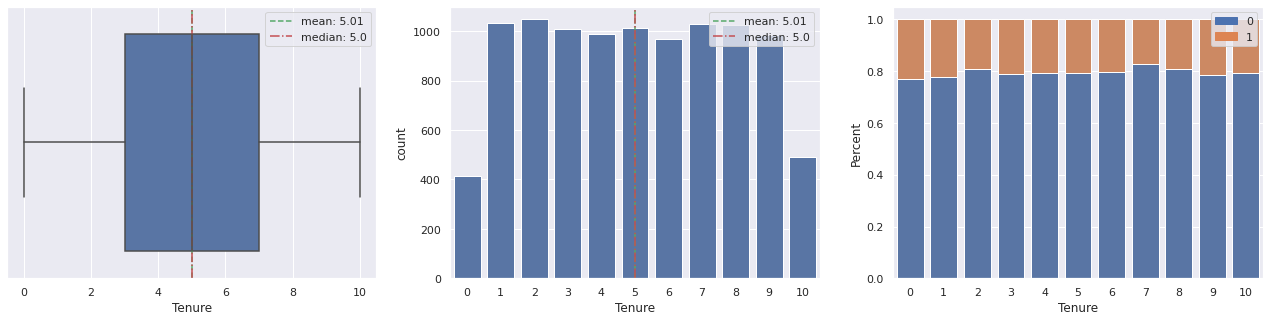

In [ ]:
histbox("Tenure", True)

- There are no statistical outliers and the tenure of customers is nearly evenly distributed over zero to ten years.
- The far right graph shows tenure does not strongly affect whether a customer exits the bank or not.

### Observations on Balance

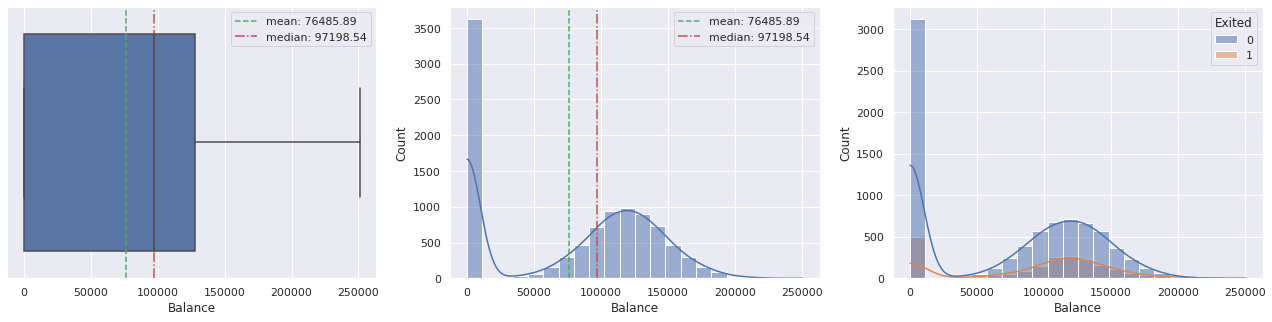

In [ ]:
histbox("Balance")

- There appears to be two modes to `Balance`.
  - There is a symmetric distribution around roughly 125,000.
  - There is a spike near zero.
- A large number of customers have a balance near zero.
- Exiting the bank does not appear to depend very much on balance.

### Observations on Number of Products

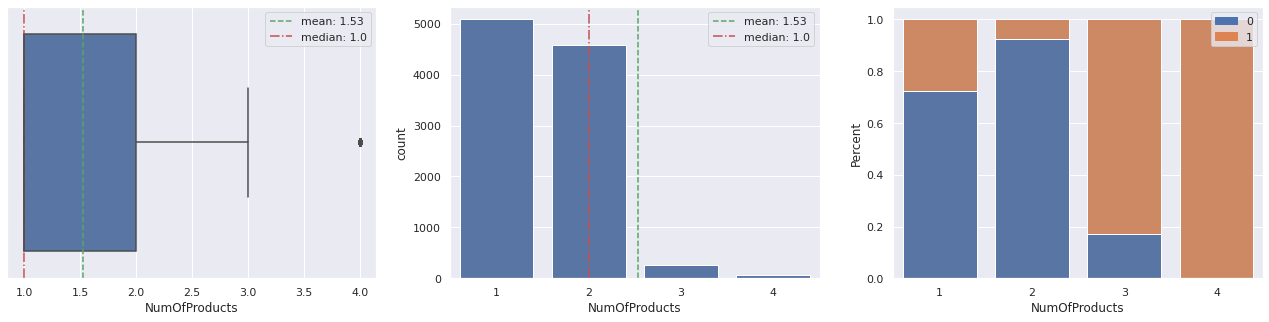

In [ ]:
histbox("NumOfProducts", True)

- Almost all customers have one or two products.
  - Slightly more than half have one.
- Customers with three or four products are almost certain to exit the bank.
  - Customers with two products are the most likely to stay with the bank.
- Customers who have four products are considered statistical outliers.  We will not drop these since they hold meaningful information.

### Observations on Estimated Salary

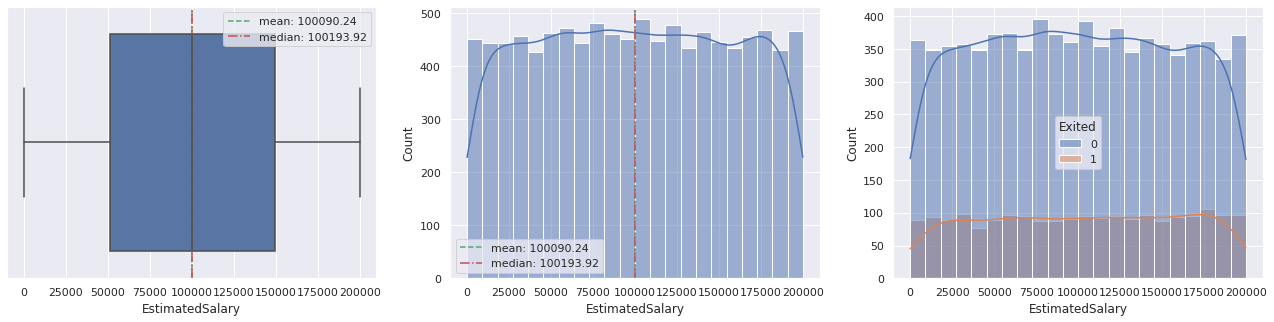

In [ ]:
histbox("EstimatedSalary")

- There are no outliers in `EstimatedSalary` and the counts are distributed evenly for all salary bins.
- The salary of a customer barely affects whether the customer will exit.

### Observations on Has Credit Card

HasCrCard
1      70.55
0      29.45

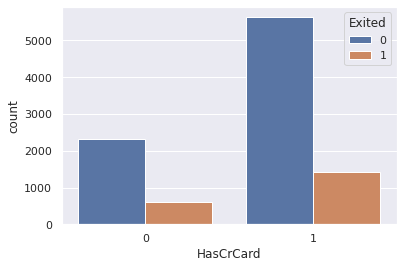

In [ ]:
sns.countplot(x=dfBank.HasCrCard, hue=dfBank.Exited);
pd.DataFrame(dfBank.HasCrCard.value_counts(normalize=True)*100)

In [ ]:
pd.DataFrame(dfBank.groupby("HasCrCard")["Exited"].value_counts(normalize=True)*100)

Exited
HasCrCard Exited           
0         0       79.185059
          1       20.814941
1         0       79.815734
          1       20.184266

- The majority of customers have a credit card with the bank.
- The above table shows exiting does not depend on having a credit card.

### Observations on Active Member

IsActiveMember
1           51.51
0           48.49

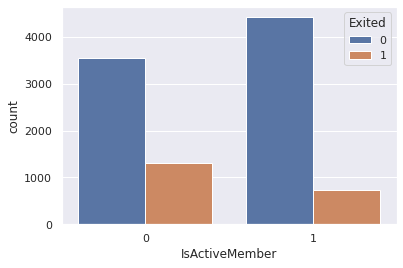

In [ ]:
sns.countplot(x=dfBank.IsActiveMember, hue=dfBank.Exited);
pd.DataFrame(dfBank.IsActiveMember.value_counts(normalize=True)*100)

In [ ]:
pd.DataFrame(dfBank.groupby("IsActiveMember")["Exited"].value_counts(normalize=True)*100)

Exited
IsActiveMember Exited           
0              0       73.149103
               1       26.850897
1              0       85.730926
               1       14.269074

- The bank considers only half of its customers to be "active" members.
- This is far less than the 80% of customers who are still with the bank so 30% of customers stay with the bank but are considered "inactive."
- Not suprisingly, "active" members are more likely to stay with the bank.

### Observations on Geography

Geography
France       50.14
Germany      25.09
Spain        24.77

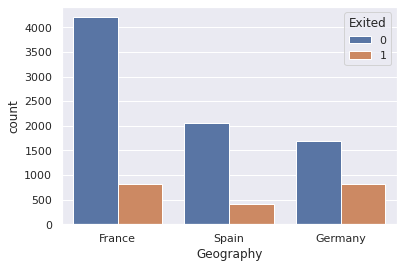

In [ ]:
sns.countplot(x=dfBank.Geography, hue=dfBank.Exited);
pd.DataFrame(dfBank.Geography.value_counts(normalize=True)*100)

In [ ]:
pd.DataFrame(dfBank.groupby("Geography")["Exited"].value_counts(normalize=True)*100)

Exited
Geography Exited           
France    0       83.845233
          1       16.154767
Germany   0       67.556796
          1       32.443204
Spain     0       83.326605
          1       16.673395

- Half of the datasets' customers live in France.
- The other half are evenly split between Spain and Germany.
- German customers are most likely to leave the bank.

### Observations on Gender

Gender
Male     54.57
Female   45.43

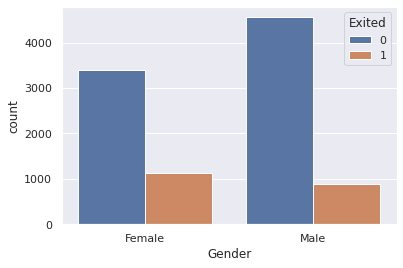

In [ ]:
sns.countplot(x=dfBank.Gender, hue=dfBank.Exited);
pd.DataFrame(dfBank.Gender.value_counts(normalize=True)*100)

In [ ]:
pd.DataFrame(dfBank.groupby("Gender")["Exited"].value_counts(normalize=True)*100)

Exited
Gender Exited           
Female 0       74.928461
       1       25.071539
Male   0       83.544072
       1       16.455928

- The dataset has somewhat more males than females.
- Female customers are somewhat more likely than male customers to leave the bank.

### Observations on Exited

Exited
0   79.63
1   20.37

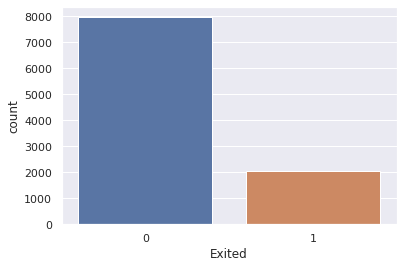

In [ ]:
sns.countplot(x=dfBank.Exited);
pd.DataFrame(dfBank.Exited.value_counts(normalize=True)*100)

- As mention before, 20% of the customers have left the bank giving us an unbalanced dataset.

## Bivariate Analysis

### Correlation values betweeen all numeric variables.

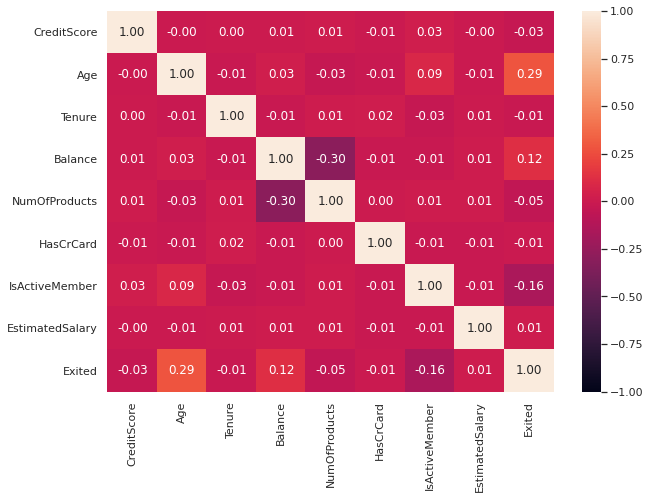

In [ ]:
# Plotting a heatmap of the correlation matrix between the dataset features, showing the correlation values in each cell
plt.figure(figsize=(10,7))
sns.heatmap(data=dfBank.corr(), annot=True, fmt=".2f", vmin=-1);

- None of the variables have a significant amount of linear correlation to another variable.
- This does not mean they are not related, just not in a linear fashion.

### Scatterplots comparing variables.

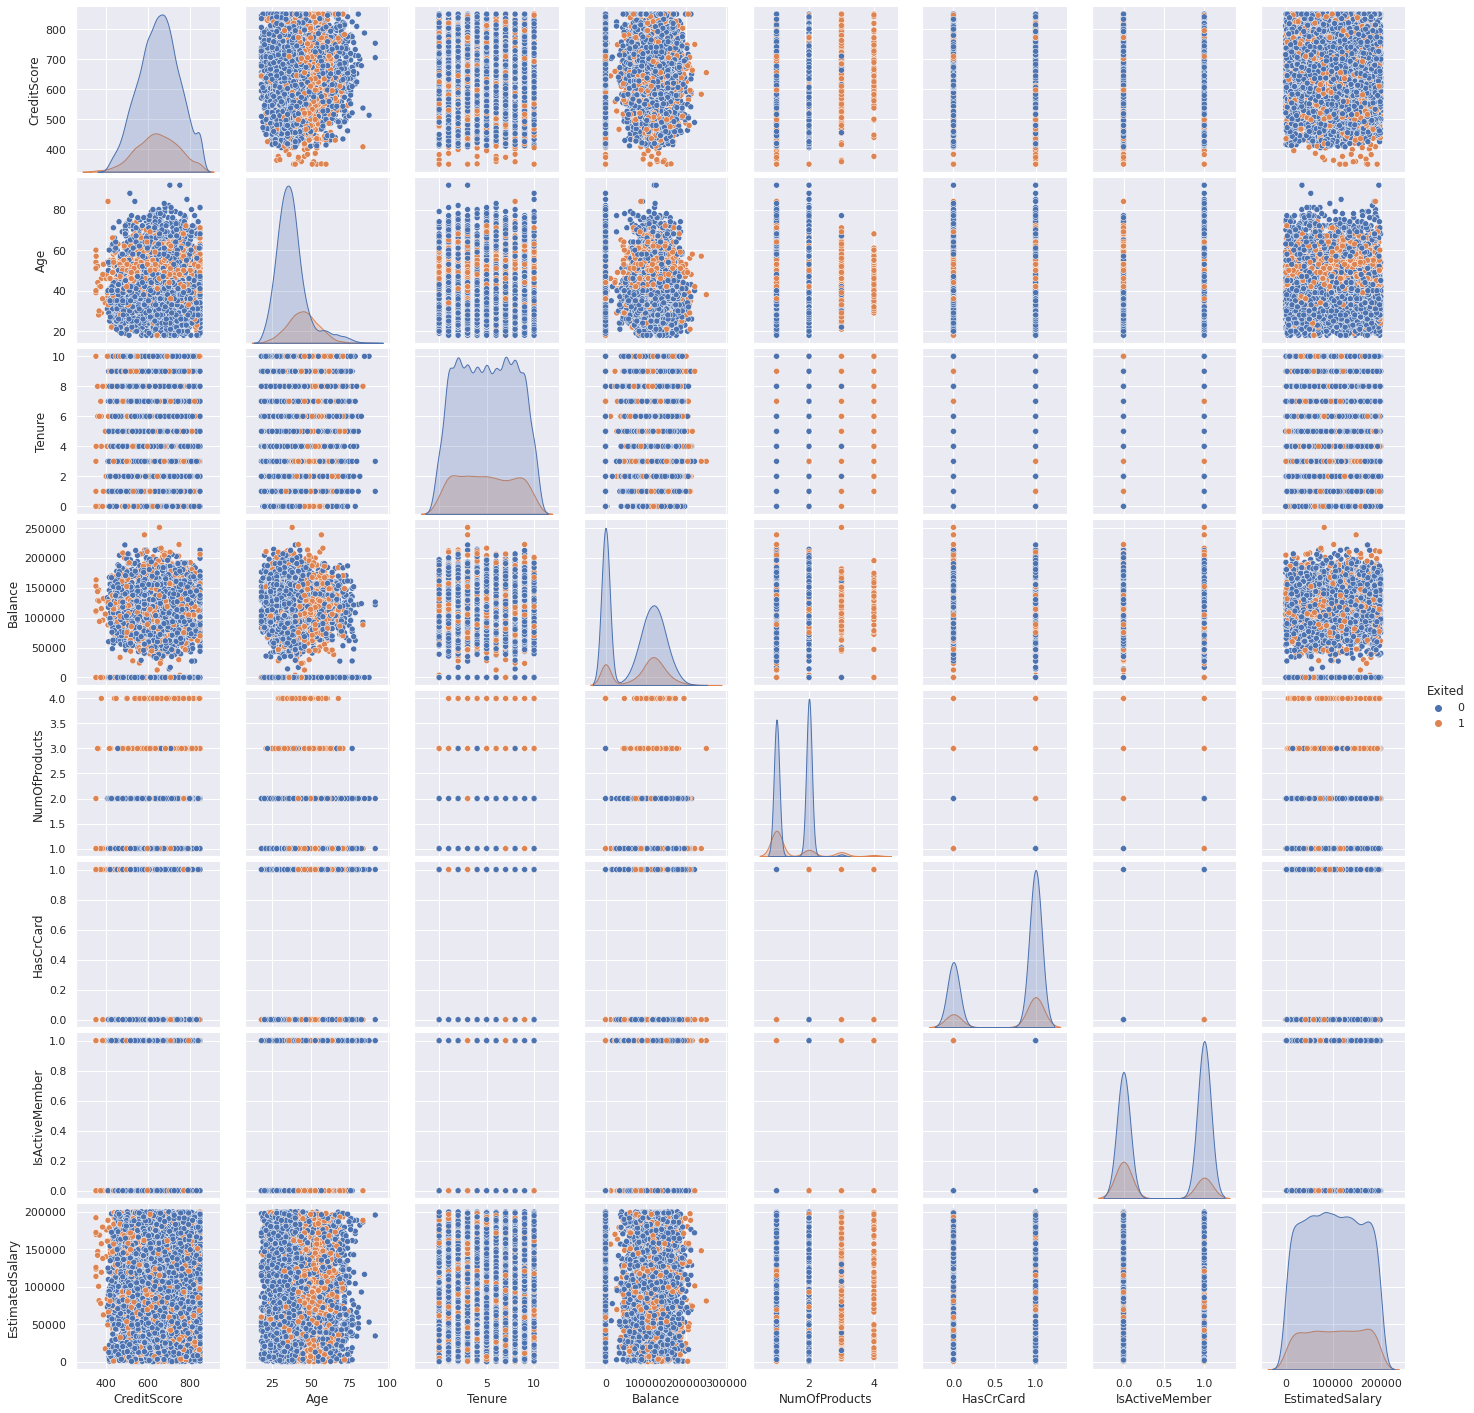

In [ ]:
# Displaying scatterplots for each pair of features and kernel density estimate plots for each individual feature
sns.pairplot(data=dfBank, diag_kind="kde", hue="Exited");

- As seen in the correlation value heatmap, none of the features are linearly dependent on each other.  Most of the scatterplots are circular clouds.
- Customers with three or four products with the bank are likely to leave.  This is counter to what I would have guessed.
- Customers whose age is around fifty seem to be the most likely to leave the bank, with older and younger customers least likely.

# Data Pre-processing

In [ ]:
dfBank.head()

CreditScore Geography  ... EstimatedSalary  Exited
RowNumber                         ...                        
1                  619    France  ...       101348.88       1
2                  608     Spain  ...       112542.58       0
3                  502    France  ...       113931.57       1
4                  699    France  ...        93826.63       0
5                  850     Spain  ...        79084.10       0

[5 rows x 11 columns]

### Converting categorical variables using One Hot Encoding
Geography and Gender need to be converted into dummy variables for training a model.

In [ ]:
# Converting 'Geography' and 'Gender' into binary one hot encoded values, dropping the first class as it is not necessary
dfBank = pd.get_dummies(data=dfBank, drop_first=True)

In [ ]:
dfBank.head()

CreditScore  Age  ...  Geography_Spain  Gender_Male
RowNumber                    ...                              
1                  619   42  ...                0            0
2                  608   41  ...                1            0
3                  502   42  ...                0            0
4                  699   39  ...                0            0
5                  850   43  ...                1            0

[5 rows x 12 columns]

As seen above, Geography is now split into Germany and Spain while Gender has been split into Male.  France and Female were dropped as they would provide duplicate information.

### Splitting Data

In [ ]:
x = dfBank.drop(columns="Exited") # The independent features are everything but the "Exited" column
y = dfBank["Exited"]              # The dependent variable is the "Exited" column

Since the target feature `Exited` has classes that are very unbalanced, we will stratify our splitting of the data into test and training sets.  This forces the training and testing sets to both have the same percentage of exited customers and customers who stayed with the bank.

In [ ]:
# Splitting into training and testing data, stratifying on the "Exited" depedent variable to have equal representation in training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
# Displaying how many customers are in the training and testing data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [ ]:
# Displaying the percentage of exited and loyal customers in the training data
pd.DataFrame(y_train.value_counts(normalize=True))

Exited
0  0.79625
1  0.20375

In [ ]:
# Displaying the percentage of exited and loyal customers in the testing data
pd.DataFrame(y_test.value_counts(normalize=True))

Exited
0  0.7965
1  0.2035

From the two tables above, we see the testing and training data have equal percentages of exited customers and customers who stayed with the bank.

### Scaling Data


Neural networks generally perform best on data that has been scaled the same.  We will apply a StandardScaler which calculates the Z-scores of each data point.

In [ ]:
scaler = StandardScaler() # Initializing the scaler

x_train = pd.DataFrame(scaler.fit_transform(X=x_train), columns=x_train.columns) # Fitting and transforming the training data
x_test = pd.DataFrame(scaler.transform(X=x_test), columns=x_train.columns)       # Transforming the testing data using the fit from the training data

In [ ]:
# Showing our scaling worked
x_train.head()

CreditScore       Age  ...  Geography_Spain  Gender_Male
0    -0.556600  3.516577  ...         1.737844    -1.095269
1    -0.370472  0.956282  ...        -0.575426     0.913017
2    -2.118010  2.189016  ...         1.737844     0.913017
3    -1.094304  0.102850  ...        -0.575426    -1.095269
4     0.994469 -0.181627  ...        -0.575426     0.913017

[5 rows x 11 columns]

In [ ]:
# Showing our scaling worked
x_test.head()

CreditScore       Age  ...  Geography_Spain  Gender_Male
0    -2.448905 -0.371278  ...         1.737844     0.913017
1    -1.187368 -0.371278  ...         1.737844     0.913017
2     0.094849 -0.560930  ...        -0.575426    -1.095269
3    -0.970218  0.387328  ...        -0.575426    -1.095269
4     1.077193  2.473494  ...        -0.575426     0.913017

[5 rows x 11 columns]

As seen above, our data is now scaled and ready.

# Model Building & Improvement

There are two basic kinds of error our prediction model can make.
- Predicting a customer will NOT exit when in reality they will.
- Predicting a customer WILL exit when in reality they won't.

In the first error, the bank will lose the customer without having tried to retain the customer.  This will be a loss of revenue for the bank and is the most damaging type of error we can make.  With this in mind we will try to maximize **recall** in order to build a model which can successfully predict customers who will exit.  However, in focusing on recall we will wrongly predict customers will leave the bank more frequently, so we will need to find the right balance between the two.

## Confusion Matrix Custom Formula

To save time and space with code later, we are creating a customer function to display a more intricate confusion matrix.

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='default',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap="Oranges",cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

Initializing dataframe to hold performance info on all models.

In [ ]:
dfModelPerformance = pd.DataFrame(columns=["Model Name", "Accuracy", "Recall", "Precision", "F1", "Threshold"])

## Model 1 - Base Model

We will start with a simple model.  Given there are only 11 data features (columns) to train on, we should not need too many layers.  Our output layer will always be the same since we are predicting a binary classification between if the customers will exit or not.  Thus, we will use one node and a sigmoid activation for our output layer.

In [ ]:
model1 = Sequential() # Initializing empty model

model1.add(Dense(units=10, activation="relu", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model1.add(Dense(units=10, activation="relu"))                    # Adding second hidden layer
model1.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model1.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model1.fit(x=x_train, y=y_train, batch_size=8, epochs=12, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model1

Epoch 1/12
800/800 [==============================] - 2s 2ms/step - loss: 0.5108 - accuracy: 0.7783 - val_loss: 0.4667 - val_accuracy: 0.7906
Epoch 2/12
800/800 [==============================] - 1s 2ms/step - loss: 0.4353 - accuracy: 0.8073 - val_loss: 0.4309 - val_accuracy: 0.8125
Epoch 3/12
800/800 [==============================] - 1s 2ms/step - loss: 0.4106 - accuracy: 0.8231 - val_loss: 0.4107 - val_accuracy: 0.8250
Epoch 4/12
800/800 [==============================] - 1s 2ms/step - loss: 0.3933 - accuracy: 0.8336 - val_loss: 0.3886 - val_accuracy: 0.8400
Epoch 5/12
800/800 [==============================] - 1s 2ms/step - loss: 0.3782 - accuracy: 0.8430 - val_loss: 0.3736 - val_accuracy: 0.8469
Epoch 6/12
800/800 [==============================] - 1s 2ms/step - loss: 0.3674 - accuracy: 0.8455 - val_loss: 0.3645 - val_accuracy: 0.8512
Epoch 7/12
800/800 [==============================] - 1s 2ms/step - loss: 0.3593 - accuracy: 0.8500 - val_loss: 0.3564 - val_accuracy: 0.8531
Epoch 

Our base model seems to not be overfitting the training data since the accuracy of validation and training data are nearly the same.

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_45 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

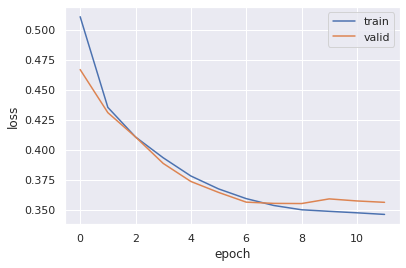

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

The training and validation losses are not separating from each other which is a good sign.

**Plotting Confusion Matrix**

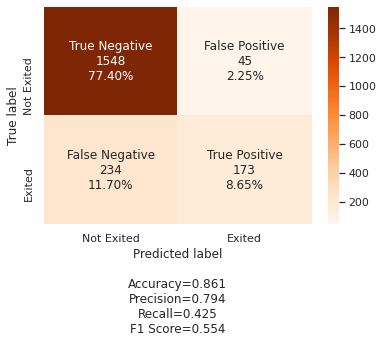

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

Having our threshold set naively at 0.5 gives us weak performance for predicting the customers who will exit the bank.  Let's look at the precision recall graphs vs threshold to see if there is a better threshold value we can pick to increase our recall score.

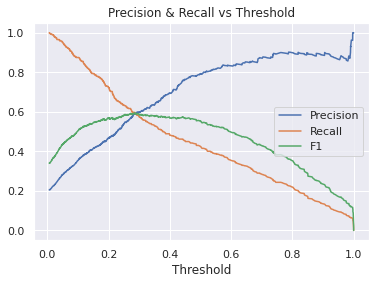

ROC Area Under Curve Score: 0.7


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

The area under the ROC curve is 0.7 which is adequate.  The closer this value is to 1 the better.

Based on the recall and precision graphs 0.2 looks to be a good balancing threshold which produces a high recall score while not completely tanking precision.

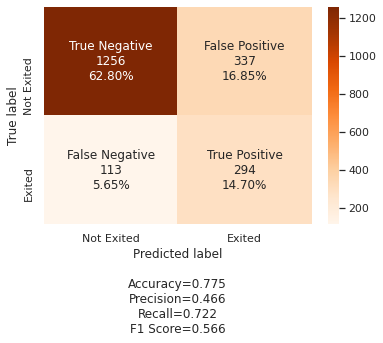

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.2 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

With our tuned threshold our base model is producing an adequate recall score with a low precision.  Our model can definitely be improved.  We will start by increasing the number of nodes in our layers and this will require us to run more epochs in order to converge.  Later, we will also use Random Up-Sampling (SMOTE) in order to balance our target feature `Exited`.

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 1", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance

Model Name  Accuracy    Recall  Precision        F1  Threshold
0    Model 1     0.775  0.722359   0.465927  0.566474        0.2

## Model 2 - Units and Epochs

Model 2 has the first hidden layer number of nodes increased to 32.  Then the second has half as many nodes at 16.  The number of epochs the model trains for is also increased due to the increase in the number of parameters our model contains.

In [ ]:
model2 = Sequential() # Initializing empty model

model2.add(Dense(units=32, activation="relu", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model2.add(Dense(units=16, activation="relu"))                    # Adding second hidden layer
model2.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model2.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model2.fit(x=x_train, y=y_train, batch_size=8, epochs=20, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model2

Epoch 1/20
800/800 [==============================] - 2s 2ms/step - loss: 0.4455 - accuracy: 0.8100 - val_loss: 0.4177 - val_accuracy: 0.8269
Epoch 2/20
800/800 [==============================] - 2s 2ms/step - loss: 0.3967 - accuracy: 0.8378 - val_loss: 0.3934 - val_accuracy: 0.8394
Epoch 3/20
800/800 [==============================] - 1s 2ms/step - loss: 0.3686 - accuracy: 0.8498 - val_loss: 0.3694 - val_accuracy: 0.8512
Epoch 4/20
800/800 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8561 - val_loss: 0.3624 - val_accuracy: 0.8537
Epoch 5/20
800/800 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8597 - val_loss: 0.3627 - val_accuracy: 0.8500
Epoch 6/20
800/800 [==============================] - 1s 2ms/step - loss: 0.3425 - accuracy: 0.8584 - val_loss: 0.3547 - val_accuracy: 0.8500
Epoch 7/20
800/800 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8628 - val_loss: 0.3537 - val_accuracy: 0.8550
Epoch 

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_48 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 17        
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

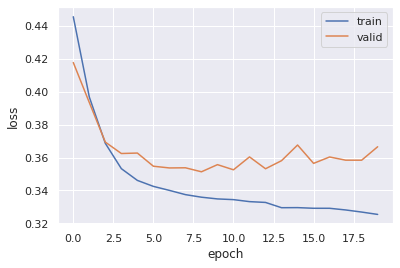

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

The training and validation losses separate which suggests that our model is overfitting our data.  This might indicate we now have too many nodes in our model.

**Plotting Confusion Matrix**

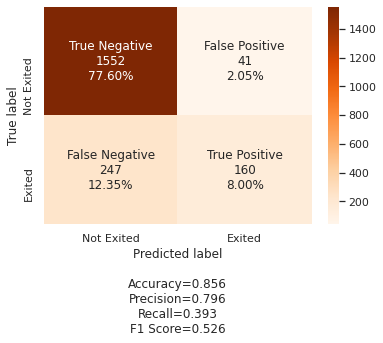

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

Recall is low, we need to find a better threshold than 0.5.

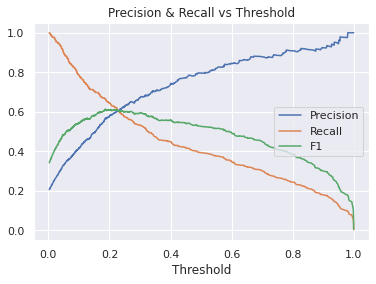

ROC Area Under Curve Score: 0.68


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

Our ROC score is slightly less than before (0.7).  A threshold value of 0.2 seems to be a good choice again to maximize recall.

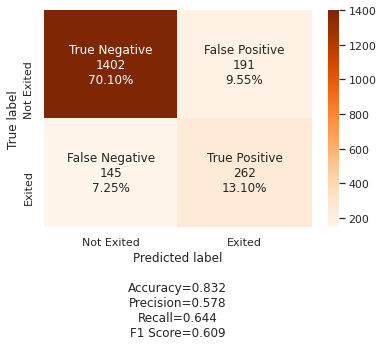

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.2 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 2", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

The recall score has suffered but the precision is better than the base model.  Next we will halve the number of nodes in each layer.

## Model 3 - Units and Epochs

Below, we have halved the number of nodes in the first hidden layer.

In [ ]:
model3 = Sequential() # Initializing empty model

model3.add(Dense(units=16, activation="relu", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model3.add(Dense(units=16, activation="relu"))                    # Adding second hidden layer
model3.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model3.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model3.fit(x=x_train, y=y_train, batch_size=8, epochs=16, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model3

Epoch 1/16
800/800 [==============================] - 2s 2ms/step - loss: 0.4728 - accuracy: 0.7909 - val_loss: 0.4308 - val_accuracy: 0.8200
Epoch 2/16
800/800 [==============================] - 1s 2ms/step - loss: 0.4163 - accuracy: 0.8297 - val_loss: 0.4100 - val_accuracy: 0.8294
Epoch 3/16
800/800 [==============================] - 1s 2ms/step - loss: 0.3958 - accuracy: 0.8372 - val_loss: 0.3879 - val_accuracy: 0.8438
Epoch 4/16
800/800 [==============================] - 1s 2ms/step - loss: 0.3762 - accuracy: 0.8441 - val_loss: 0.3691 - val_accuracy: 0.8525
Epoch 5/16
800/800 [==============================] - 1s 2ms/step - loss: 0.3603 - accuracy: 0.8517 - val_loss: 0.3539 - val_accuracy: 0.8537
Epoch 6/16
800/800 [==============================] - 1s 2ms/step - loss: 0.3518 - accuracy: 0.8553 - val_loss: 0.3483 - val_accuracy: 0.8581
Epoch 7/16
800/800 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8589 - val_loss: 0.3486 - val_accuracy: 0.8562
Epoch 

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 16)                192       
_________________________________________________________________
dense_51 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

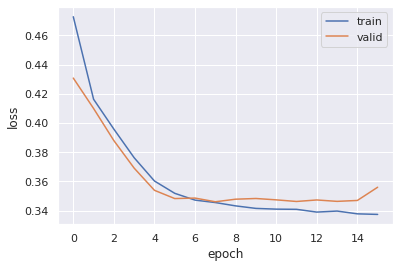

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

The training and validation losses are still separating suggesting we still may have too many nodes.

**Plotting Confusion Matrix**

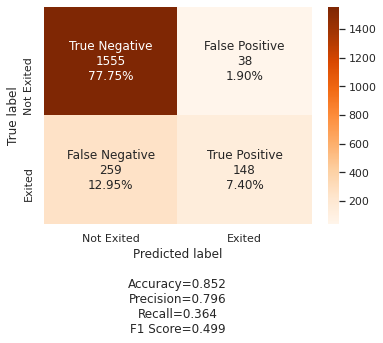

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

We have a similarly low recall score.  Let's find a better threshold.

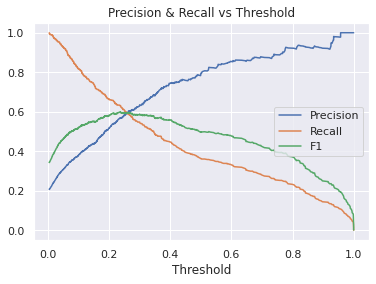

ROC Area Under Curve Score: 0.67


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

Again, a threshold of 0.2 seems to be a solid choice.  The ROC score has decreased again to 0.67.

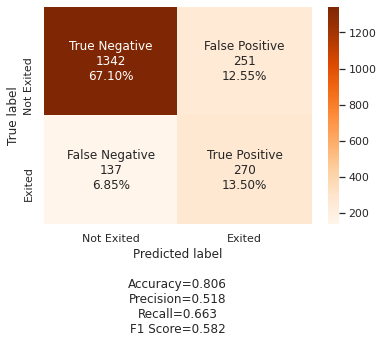

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.2 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 3", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

The recall score of this model is lower than the first however this came with an increase in the precision score.  Next, we will halve the number of nodes in the second hidden layer.

## Model 4 - Units and Epochs

The number of nodes in the second hidden layer has been halved.

In [ ]:
model4 = Sequential() # Initializing empty model

model4.add(Dense(units=16, activation="relu", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model4.add(Dense(units=8, activation="relu"))                    # Adding second hidden layer
model4.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model4.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model4.fit(x=x_train, y=y_train, batch_size=8, epochs=12, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model4

Epoch 1/12
800/800 [==============================] - 2s 2ms/step - loss: 0.4684 - accuracy: 0.7972 - val_loss: 0.4399 - val_accuracy: 0.7906
Epoch 2/12
800/800 [==============================] - 2s 2ms/step - loss: 0.4168 - accuracy: 0.8086 - val_loss: 0.4159 - val_accuracy: 0.8144
Epoch 3/12
800/800 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.8270 - val_loss: 0.3982 - val_accuracy: 0.8369
Epoch 4/12
800/800 [==============================] - 1s 2ms/step - loss: 0.3818 - accuracy: 0.8428 - val_loss: 0.3853 - val_accuracy: 0.8419
Epoch 5/12
800/800 [==============================] - 2s 2ms/step - loss: 0.3713 - accuracy: 0.8464 - val_loss: 0.3727 - val_accuracy: 0.8462
Epoch 6/12
800/800 [==============================] - 1s 2ms/step - loss: 0.3635 - accuracy: 0.8500 - val_loss: 0.3673 - val_accuracy: 0.8512
Epoch 7/12
800/800 [==============================] - 1s 2ms/step - loss: 0.3571 - accuracy: 0.8539 - val_loss: 0.3630 - val_accuracy: 0.8537
Epoch 

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 16)                192       
_________________________________________________________________
dense_54 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 9         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

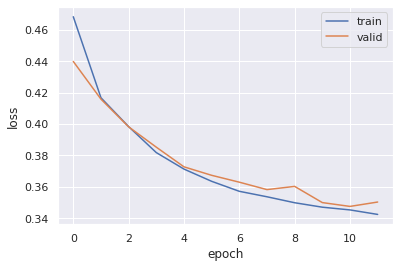

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

As expected, lowering the number of nodes has caused the training and validation losses to not diverge as strongly.

**Plotting Confusion Matrix**

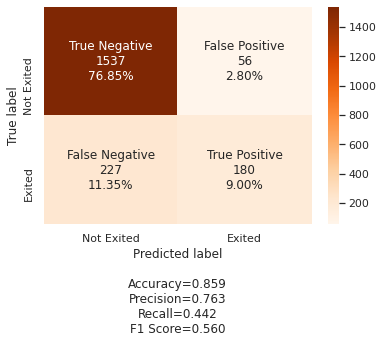

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

The naive threshold of 0.5 will not work.

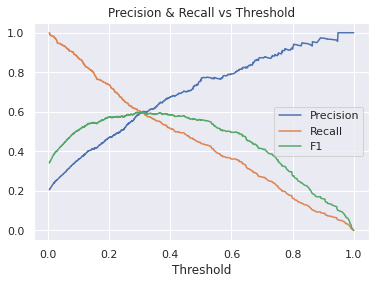

ROC Area Under Curve Score: 0.7


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

Again, a threshold of 0.2 seems like the best choice.  The ROC score has increase to 0.7.

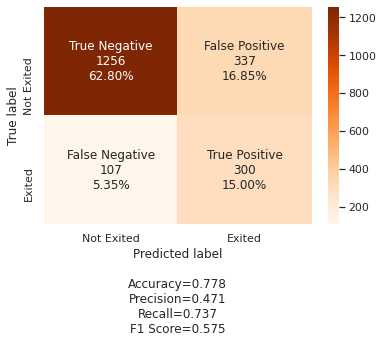

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.2 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 4", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

This model has produced the highest recall score yet with a precision score slightly higher than model 1 as well.  Now we will increase and decrease the number of layers to try to improve our model.  With only 11 input features, less layers will most likely perform better.

## Model 5 - Three Layers



Below, we have added a third hidden layer keeping the number of nodes the same as the base model (Model 1).

In [ ]:
model5 = Sequential() # Initializing empty model

model5.add(Dense(units=10, activation="relu", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model5.add(Dense(units=10, activation="relu"))                    # Adding second hidden layer
model5.add(Dense(units=10, activation="relu"))                    # Adding third hidden layer
model5.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model5.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model5.fit(x=x_train, y=y_train, batch_size=8, epochs=16, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model5

Epoch 1/16
800/800 [==============================] - 2s 2ms/step - loss: 0.4714 - accuracy: 0.8072 - val_loss: 0.4389 - val_accuracy: 0.8131
Epoch 2/16
800/800 [==============================] - 1s 2ms/step - loss: 0.4197 - accuracy: 0.8159 - val_loss: 0.4195 - val_accuracy: 0.8263
Epoch 3/16
800/800 [==============================] - 2s 2ms/step - loss: 0.4013 - accuracy: 0.8308 - val_loss: 0.4021 - val_accuracy: 0.8388
Epoch 4/16
800/800 [==============================] - 1s 2ms/step - loss: 0.3847 - accuracy: 0.8411 - val_loss: 0.3836 - val_accuracy: 0.8444
Epoch 5/16
800/800 [==============================] - 2s 2ms/step - loss: 0.3686 - accuracy: 0.8473 - val_loss: 0.3682 - val_accuracy: 0.8462
Epoch 6/16
800/800 [==============================] - 1s 2ms/step - loss: 0.3581 - accuracy: 0.8525 - val_loss: 0.3697 - val_accuracy: 0.8450
Epoch 7/16
800/800 [==============================] - 1s 2ms/step - loss: 0.3537 - accuracy: 0.8545 - val_loss: 0.3548 - val_accuracy: 0.8500
Epoch 

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_57 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_58 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 11        
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

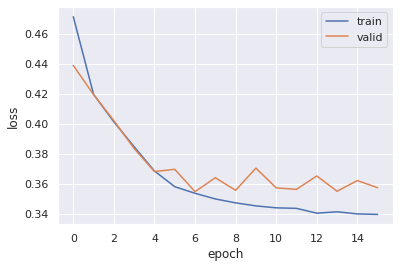

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

The model does seem to overfit the data with the training and validation losses separating.

**Plotting Confusion Matrix**

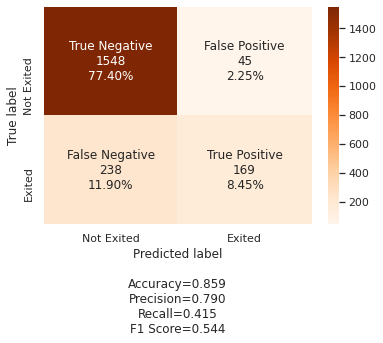

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

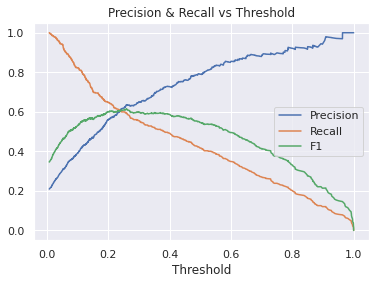

ROC Area Under Curve Score: 0.69


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

Based on the above graph, 0.2 seems to be a good balancing threshold.  The ROC score is similar to the other models at 0.69.

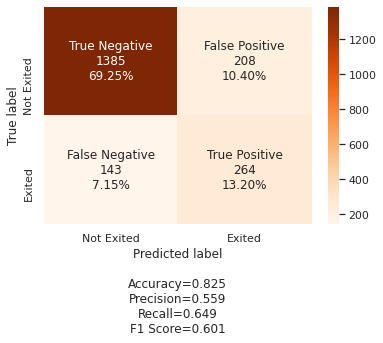

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.2 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 5", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

This model is not performing well.  Next we decrease the number of hidden layers to one.

## Model 6 - One Layer

This model only includes one hidden layer.

In [ ]:
model6 = Sequential() # Initializing empty model

model6.add(Dense(units=10, activation="relu", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model6.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model6.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model6.fit(x=x_train, y=y_train, batch_size=8, epochs=12, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model6

Epoch 1/12
800/800 [==============================] - 3s 3ms/step - loss: 0.4558 - accuracy: 0.8034 - val_loss: 0.4507 - val_accuracy: 0.8081
Epoch 2/12
800/800 [==============================] - 1s 2ms/step - loss: 0.4288 - accuracy: 0.8133 - val_loss: 0.4397 - val_accuracy: 0.8125
Epoch 3/12
800/800 [==============================] - 1s 2ms/step - loss: 0.4191 - accuracy: 0.8178 - val_loss: 0.4315 - val_accuracy: 0.8206
Epoch 4/12
800/800 [==============================] - 1s 1ms/step - loss: 0.4116 - accuracy: 0.8244 - val_loss: 0.4222 - val_accuracy: 0.8263
Epoch 5/12
800/800 [==============================] - 1s 2ms/step - loss: 0.4034 - accuracy: 0.8280 - val_loss: 0.4144 - val_accuracy: 0.8325
Epoch 6/12
800/800 [==============================] - 1s 2ms/step - loss: 0.3948 - accuracy: 0.8338 - val_loss: 0.4053 - val_accuracy: 0.8363
Epoch 7/12
800/800 [==============================] - 1s 2ms/step - loss: 0.3861 - accuracy: 0.8380 - val_loss: 0.3949 - val_accuracy: 0.8444
Epoch 

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

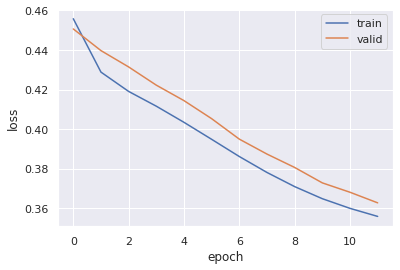

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

The training and validation losses are separated for virtually the entire training cycle.

**Plotting Confusion Matrix**

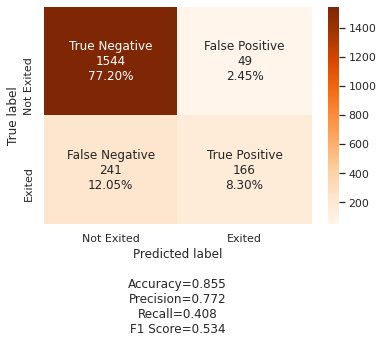

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

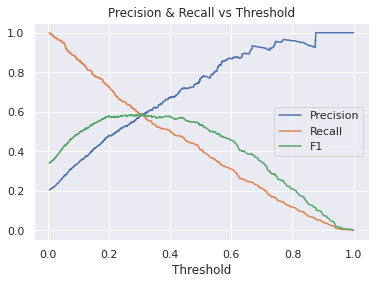

ROC Area Under Curve Score: 0.69


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

A threshold value of 0.2 still seems to be a good fit for this model.

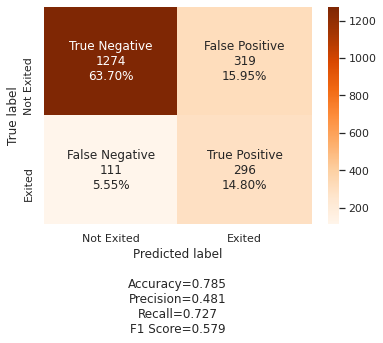

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.2 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 6", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

Including only one layer has performed similar to Model 4 and Model 1.  Model 4 still has slightly better recall.  We will try to improve this one layer model by increasing the number of nodes in the layer.

## Model 7 - One Layer, More Units

The one layer model with an increase to 16 nodes from 10 nodes.

In [ ]:
model7 = Sequential() # Initializing empty model

model7.add(Dense(units=16, activation="relu", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model7.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model7.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model7.fit(x=x_train, y=y_train, batch_size=8, epochs=12, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model7

Epoch 1/12
800/800 [==============================] - 2s 2ms/step - loss: 0.5068 - accuracy: 0.7827 - val_loss: 0.4456 - val_accuracy: 0.8100
Epoch 2/12
800/800 [==============================] - 1s 2ms/step - loss: 0.4258 - accuracy: 0.8186 - val_loss: 0.4302 - val_accuracy: 0.8156
Epoch 3/12
800/800 [==============================] - 1s 2ms/step - loss: 0.4155 - accuracy: 0.8255 - val_loss: 0.4266 - val_accuracy: 0.8206
Epoch 4/12
800/800 [==============================] - 1s 1ms/step - loss: 0.4098 - accuracy: 0.8286 - val_loss: 0.4178 - val_accuracy: 0.8263
Epoch 5/12
800/800 [==============================] - 1s 2ms/step - loss: 0.3999 - accuracy: 0.8341 - val_loss: 0.4040 - val_accuracy: 0.8319
Epoch 6/12
800/800 [==============================] - 1s 1ms/step - loss: 0.3878 - accuracy: 0.8397 - val_loss: 0.3923 - val_accuracy: 0.8369
Epoch 7/12
800/800 [==============================] - 1s 1ms/step - loss: 0.3755 - accuracy: 0.8477 - val_loss: 0.3781 - val_accuracy: 0.8475
Epoch 

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 16)                192       
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 17        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

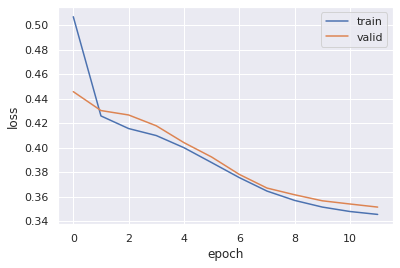

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

This model does seem to converge without overfitting the training data.

**Plotting Confusion Matrix**

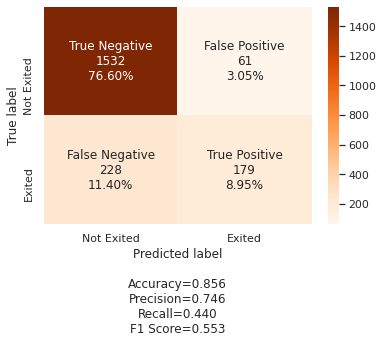

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

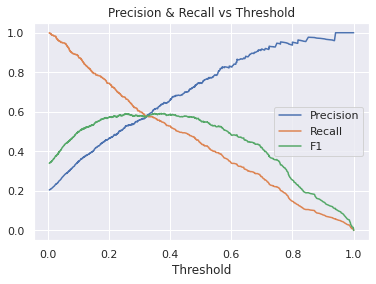

ROC Area Under Curve Score: 0.7


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

The ROC score is 0.7 which is similar to all other models.  A threshold of 0.2 seems to be the best option still to maximize recall without completely tanking precision.

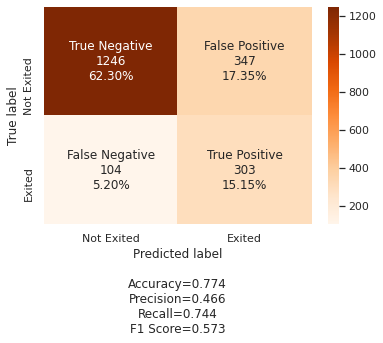

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.2 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 7", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

This single layer model with 16 nodes has the best recall score so far.  The precision score is similar to the other models with high recall.

## Up-Sampling Dataset - SMOTE
SMOTE creates new, synthetic data points from the original data.  Since our dataset has far more customers who stay with the bank than have exited, we can use SMOTE to artificially create data points of customers who exited the bank.  This should help us to increase our recall score and be able to better identify customers who will exit.

In [ ]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 1630
Before UpSampling, counts of label '0': 6370 

After UpSampling, counts of label '1': 6370
After UpSampling, counts of label '0': 6370 

After UpSampling, the shape of train_X: (12740, 11)
After UpSampling, the shape of train_y: (12740,) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Now we have the same number of customers who have exited as who have stayed with the bank.  Let's use this data to train some of our previous models.

## Model 8 - Base Model with SMOTE

In [ ]:
model8 = Sequential() # Initializing empty model

model8.add(Dense(units=10, activation="relu", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model8.add(Dense(units=10, activation="relu"))                    # Adding second hidden layer
model8.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model8.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model8.fit(x=x_train_res, y=y_train_res, batch_size=8, epochs=12, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model8

Epoch 1/12
1274/1274 [==============================] - 3s 2ms/step - loss: 0.5902 - accuracy: 0.6868 - val_loss: 0.8854 - val_accuracy: 0.5687
Epoch 2/12
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5393 - accuracy: 0.7352 - val_loss: 0.8019 - val_accuracy: 0.6652
Epoch 3/12
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5063 - accuracy: 0.7607 - val_loss: 0.7116 - val_accuracy: 0.7104
Epoch 4/12
1274/1274 [==============================] - 2s 2ms/step - loss: 0.4729 - accuracy: 0.7772 - val_loss: 0.6731 - val_accuracy: 0.7253
Epoch 5/12
1274/1274 [==============================] - 2s 2ms/step - loss: 0.4551 - accuracy: 0.7921 - val_loss: 0.6685 - val_accuracy: 0.7057
Epoch 6/12
1274/1274 [==============================] - 2s 2ms/step - loss: 0.4468 - accuracy: 0.7961 - val_loss: 0.6685 - val_accuracy: 0.7029
Epoch 7/12
1274/1274 [==============================] - 2s 2ms/step - loss: 0.4426 - accuracy: 0.8018 - val_loss: 0.6381 - val_accuracy:

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_65 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

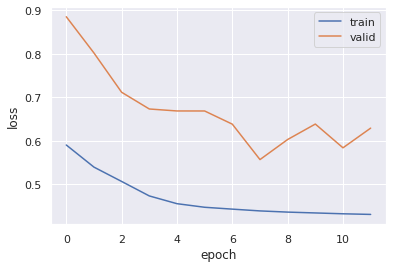

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

Unfortunately, the validation and training losses are separated completely from each other.  Let's see how we are performing on the test data.

**Plotting Confusion Matrix**

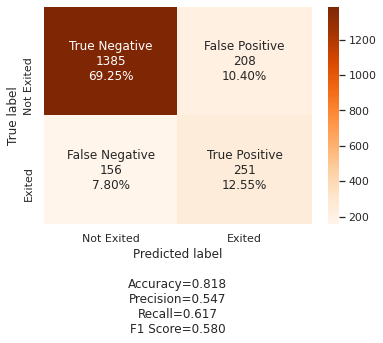

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

As expected, up-sampling using SMOTE has increased our recall score greatly.  Now let us tune our threshold.

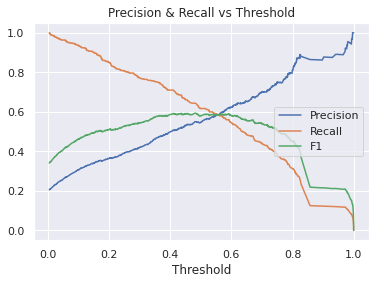

ROC Area Under Curve Score: 0.74


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

It still seems like 0.2 is a strong threshold to choose.  Also, the ROC score has increased to 0.74.

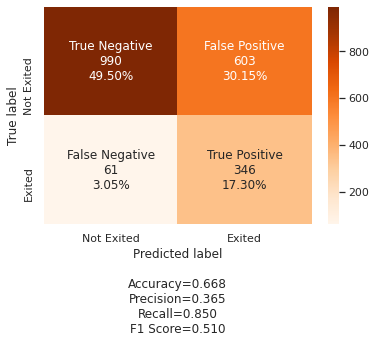

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.2 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 8", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

Our model clearly has the highest recall score so far, however this has come at the cost of precision.  Our model now has a harder time identifying customers correctly who will stay with the bank.

## Model 9 - Units and Epochs with SMOTE

We are increasing our number of nodes back to 32 and 16 for the first and second hidden layers respectively.

In [ ]:
model9 = Sequential() # Initializing empty model

model9.add(Dense(units=32, activation="relu", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model9.add(Dense(units=16, activation="relu"))                    # Adding second hidden layer
model9.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model9.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model9.fit(x=x_train_res, y=y_train_res, batch_size=8, epochs=12, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model9

Epoch 1/12
1274/1274 [==============================] - 3s 2ms/step - loss: 0.5228 - accuracy: 0.7417 - val_loss: 0.6049 - val_accuracy: 0.6919
Epoch 2/12
1274/1274 [==============================] - 2s 2ms/step - loss: 0.4483 - accuracy: 0.7921 - val_loss: 0.6487 - val_accuracy: 0.6617
Epoch 3/12
1274/1274 [==============================] - 2s 2ms/step - loss: 0.4313 - accuracy: 0.7999 - val_loss: 0.6039 - val_accuracy: 0.6794
Epoch 4/12
1274/1274 [==============================] - 2s 2ms/step - loss: 0.4246 - accuracy: 0.8032 - val_loss: 0.5553 - val_accuracy: 0.6978
Epoch 5/12
1274/1274 [==============================] - 2s 2ms/step - loss: 0.4207 - accuracy: 0.8029 - val_loss: 0.5906 - val_accuracy: 0.6974
Epoch 6/12
1274/1274 [==============================] - 2s 2ms/step - loss: 0.4178 - accuracy: 0.8081 - val_loss: 0.5864 - val_accuracy: 0.6833
Epoch 7/12
1274/1274 [==============================] - 2s 2ms/step - loss: 0.4141 - accuracy: 0.8094 - val_loss: 0.5547 - val_accuracy:

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_68 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 17        
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

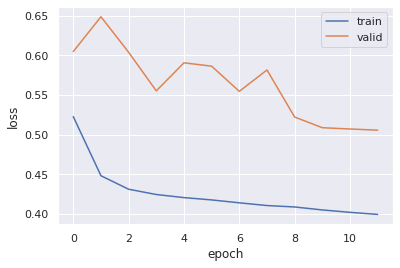

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

**Plotting Confusion Matrix**

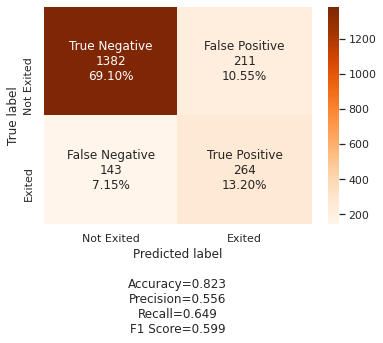

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

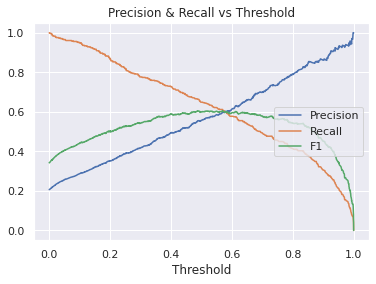

ROC Area Under Curve Score: 0.76


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

While the validation and training losses are very separated, our ROC score has increased to 0.76.  A threshold value of 0.2 remains a solid choice.

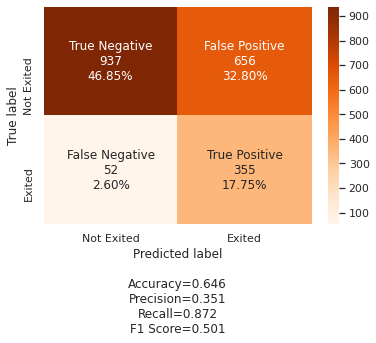

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.2 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 9", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

Increasing the number of nodes has increased our recall by 2.2% but decreased our precision.  Let's try to control our overfitting below.

## Model 10 - Units and Dropout with SMOTE

Since our validation and training losses are so separated from each other we have added dropouts to try to prevent overfitting our training data.

In [ ]:
model10 = Sequential() # Initializing empty model

model10.add(Dense(units=32, activation="relu", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model10.add(Dropout(0.5))                                          # Adding dropout to prevent overfitting
model10.add(Dense(units=16, activation="relu"))                    # Adding second hidden layer
model10.add(Dropout(0.5))                                          # Adding dropout to prevent overfitting
model10.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model10.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model10.fit(x=x_train_res, y=y_train_res, batch_size=8, epochs=30, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model10

Epoch 1/30
1274/1274 [==============================] - 3s 2ms/step - loss: 0.6335 - accuracy: 0.6472 - val_loss: 0.8156 - val_accuracy: 0.5137
Epoch 2/30
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5832 - accuracy: 0.7073 - val_loss: 0.8084 - val_accuracy: 0.5192
Epoch 3/30
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5646 - accuracy: 0.7268 - val_loss: 0.7550 - val_accuracy: 0.5522
Epoch 4/30
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5502 - accuracy: 0.7374 - val_loss: 0.8057 - val_accuracy: 0.5251
Epoch 5/30
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5402 - accuracy: 0.7451 - val_loss: 0.6812 - val_accuracy: 0.5997
Epoch 6/30
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5272 - accuracy: 0.7550 - val_loss: 0.6952 - val_accuracy: 0.5867
Epoch 7/30
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5184 - accuracy: 0.7595 - val_loss: 0.7552 - val_accuracy:

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 32)                384       
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 17        
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

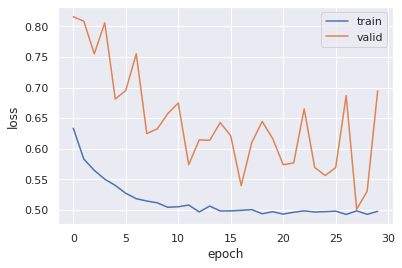

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

On average our validation losses are closer to the training losses however there are extreme jumps in the validation loss.

**Plotting Confusion Matrix**

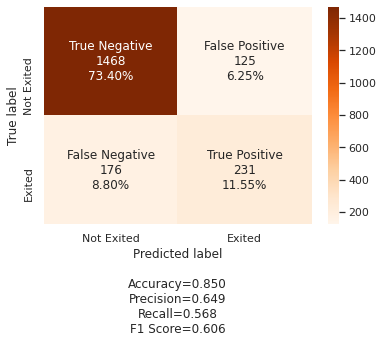

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

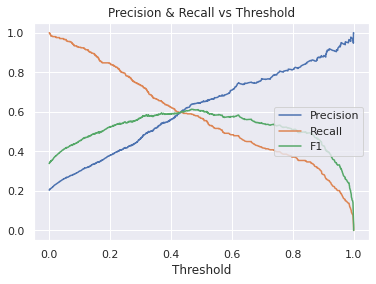

ROC Area Under Curve Score: 0.74


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

This time we will pick a slightly higher threshold of 0.23 in order to increase our precision somewhat.  While we do want to maximize our recall score, having a very low precision is not something we want either.

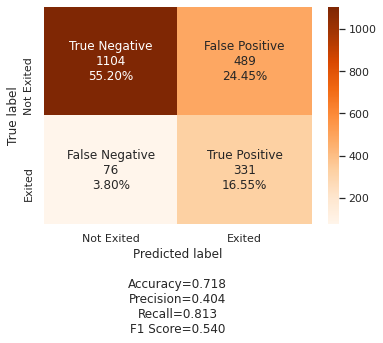

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.23 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 10", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

This model has not performed as well as the other SMOTE models.  We will now decrease the number of nodes in each layer.

## Model 11 - Units and Dropout with SMOTE

The below model has 20 nodes in the first hidden layer and 10 in the second.

In [ ]:
model11 = Sequential() # Initializing empty model

model11.add(Dense(units=20, activation="relu", kernel_initializer="he_normal", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model11.add(Dropout(0.5))                                          # Adding dropout to prevent overfitting
model11.add(Dense(units=10, kernel_initializer="he_normal", activation="relu"))                    # Adding second hidden layer
model11.add(Dropout(0.5))                                          # Adding dropout to prevent overfitting
model11.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model11.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model11.fit(x=x_train_res, y=y_train_res, batch_size=8, epochs=24, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model11

Epoch 1/24
1274/1274 [==============================] - 3s 2ms/step - loss: 0.7623 - accuracy: 0.5927 - val_loss: 0.8911 - val_accuracy: 0.0184
Epoch 2/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.6382 - accuracy: 0.6352 - val_loss: 0.9122 - val_accuracy: 0.0750
Epoch 3/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.6066 - accuracy: 0.6588 - val_loss: 0.8030 - val_accuracy: 0.3677
Epoch 4/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5907 - accuracy: 0.6746 - val_loss: 0.8274 - val_accuracy: 0.3885
Epoch 5/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5798 - accuracy: 0.6840 - val_loss: 0.7942 - val_accuracy: 0.4360
Epoch 6/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5694 - accuracy: 0.6884 - val_loss: 0.7424 - val_accuracy: 0.5027
Epoch 7/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5686 - accuracy: 0.6981 - val_loss: 0.7598 - val_accuracy:

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 20)                240       
_________________________________________________________________
dropout_14 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_15 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 11        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

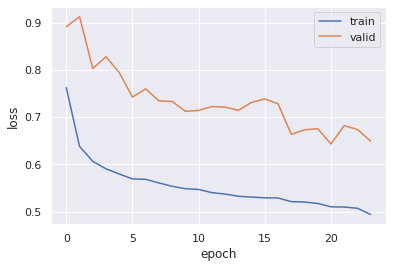

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

The model is producing validation losses which are separated from the training losses.

**Plotting Confusion Matrix**

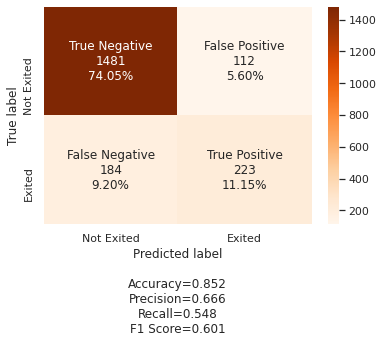

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

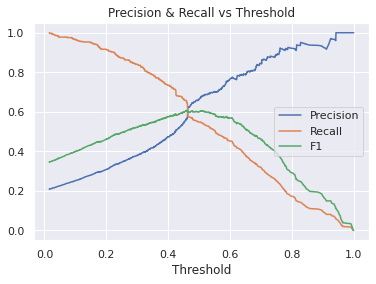

ROC Area Under Curve Score: 0.74


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

Above we can see recall stays greater for larger thresholds.  We will thus choose a large threshold value of 0.25.

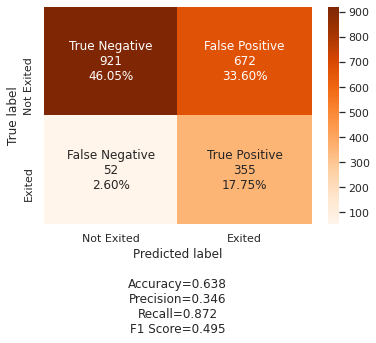

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.25 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 11", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

This model is tied for the highest recall value however it has a smaller precision score.

## Model 12 - SGD

We will now try a different optimizer function called SGD or Stochastic gradient decent.

In [ ]:
model12 = Sequential() # Initializing empty model

model12.add(Dense(units=20, activation="relu", kernel_initializer="he_normal", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model12.add(Dropout(0.5))                                          # Adding dropout to prevent overfitting
model12.add(Dense(units=10, kernel_initializer="he_normal", activation="relu"))                    # Adding second hidden layer
model12.add(Dropout(0.5))                                          # Adding dropout to prevent overfitting
model12.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model12.compile(optimizer="SGD", loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model12.fit(x=x_train_res, y=y_train_res, batch_size=8, epochs=24, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model12

Epoch 1/24
1274/1274 [==============================] - 3s 2ms/step - loss: 0.6800 - accuracy: 0.6234 - val_loss: 0.9065 - val_accuracy: 0.0200
Epoch 2/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.6417 - accuracy: 0.6458 - val_loss: 0.9775 - val_accuracy: 0.0663
Epoch 3/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.6366 - accuracy: 0.6529 - val_loss: 0.9454 - val_accuracy: 0.1079
Epoch 4/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.6298 - accuracy: 0.6599 - val_loss: 0.9209 - val_accuracy: 0.1695
Epoch 5/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.6223 - accuracy: 0.6664 - val_loss: 0.8620 - val_accuracy: 0.2724
Epoch 6/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.6141 - accuracy: 0.6709 - val_loss: 0.8911 - val_accuracy: 0.2649
Epoch 7/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.6074 - accuracy: 0.6797 - val_loss: 0.8591 - val_accuracy:

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 20)                240       
_________________________________________________________________
dropout_16 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_17 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 11        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

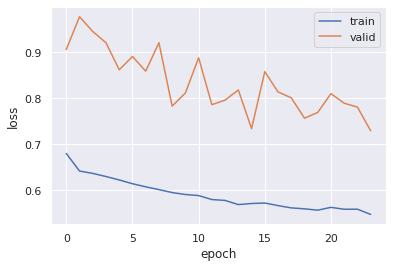

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

SGD does not seem to help us on our training and validation loss separation.

**Plotting Confusion Matrix**

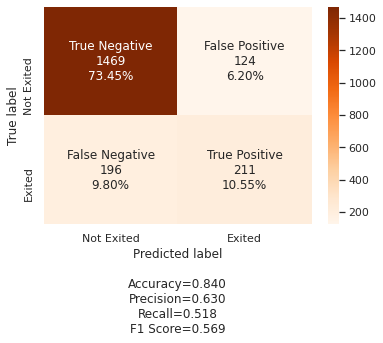

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

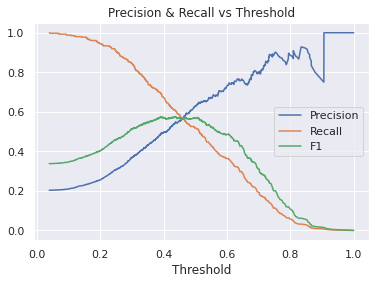

ROC Area Under Curve Score: 0.72


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

In order to not completely tank our precision score we will choose a higher threshold of 0.3.  This works decently as recall stays higher for longer.

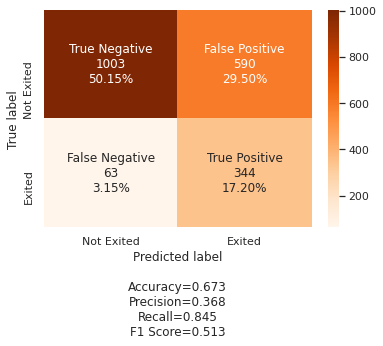

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.3 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 12", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

This model has a lower recall score but a higher precision score.

## Model 13 - Hyperbolic Tangent (tanh)

Next we will try a different activation function for each of our hidden layers.  Instead of Relu we will use the hyperbolic tangent function which includes negative values in its output.  This can aid in preventing nodes from "dying off" and not affecting the model.

In [ ]:
model13 = Sequential() # Initializing empty model

model13.add(Dense(units=20, activation="tanh", kernel_initializer="he_normal", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model13.add(Dropout(0.5))                                          # Adding dropout to prevent overfitting
model13.add(Dense(units=10, kernel_initializer="he_normal", activation="tanh"))                    # Adding second hidden layer
model13.add(Dropout(0.5))                                          # Adding dropout to prevent overfitting
model13.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model13.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model13.fit(x=x_train_res, y=y_train_res, batch_size=8, epochs=24, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model13

Epoch 1/24
1274/1274 [==============================] - 3s 2ms/step - loss: 0.7274 - accuracy: 0.5938 - val_loss: 0.7884 - val_accuracy: 0.4796
Epoch 2/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5967 - accuracy: 0.6873 - val_loss: 0.7662 - val_accuracy: 0.5420
Epoch 3/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5747 - accuracy: 0.7079 - val_loss: 0.7668 - val_accuracy: 0.5726
Epoch 4/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5663 - accuracy: 0.7141 - val_loss: 0.7495 - val_accuracy: 0.5993
Epoch 5/24
1274/1274 [==============================] - 3s 2ms/step - loss: 0.5514 - accuracy: 0.7223 - val_loss: 0.7491 - val_accuracy: 0.6138
Epoch 6/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5475 - accuracy: 0.7301 - val_loss: 0.7525 - val_accuracy: 0.5856
Epoch 7/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5401 - accuracy: 0.7331 - val_loss: 0.7439 - val_accuracy:

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 20)                240       
_________________________________________________________________
dropout_18 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_80 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_19 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 11        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

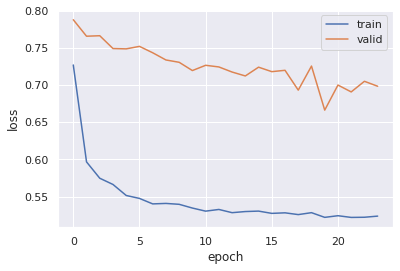

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

Hyperbolic tangent is producing one of the largest separations in training and validation losses.

**Plotting Confusion Matrix**

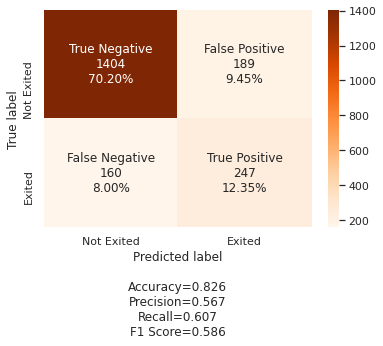

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

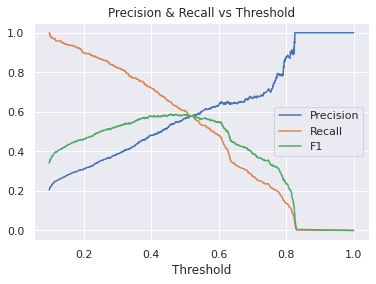

ROC Area Under Curve Score: 0.74


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

A threshold of 0.3 seems like a good balance between recall and precision.

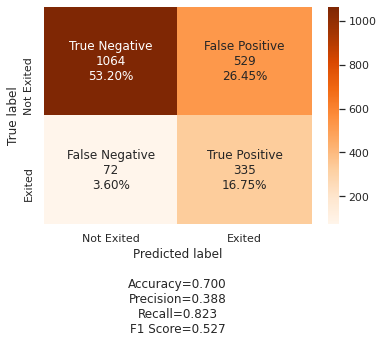

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.3 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 13", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

This model is not producing a strong recall score.

## Model 14 - Adam Learning Rate

We will now increase the learning rate of our optimizer function "Adam."  This will affect the magnitude of change in the weights of our model for each epoch of training.

In [ ]:
model14 = Sequential() # Initializing empty model

model14.add(Dense(units=20, activation="relu", kernel_initializer="he_normal", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model14.add(Dropout(0.5))                                          # Adding dropout to prevent overfitting
model14.add(Dense(units=10, kernel_initializer="he_normal", activation="relu"))                    # Adding second hidden layer
model14.add(Dropout(0.5))                                          # Adding dropout to prevent overfitting
model14.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model14.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model14.fit(x=x_train_res, y=y_train_res, batch_size=8, epochs=24, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model14

Epoch 1/24
1274/1274 [==============================] - 3s 2ms/step - loss: 0.6051 - accuracy: 0.6739 - val_loss: 0.6887 - val_accuracy: 0.5004
Epoch 2/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5577 - accuracy: 0.7208 - val_loss: 0.6595 - val_accuracy: 0.5502
Epoch 3/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5342 - accuracy: 0.7352 - val_loss: 0.6000 - val_accuracy: 0.6052
Epoch 4/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5202 - accuracy: 0.7514 - val_loss: 0.5601 - val_accuracy: 0.6338
Epoch 5/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5204 - accuracy: 0.7443 - val_loss: 0.6134 - val_accuracy: 0.5852
Epoch 6/24
1274/1274 [==============================] - 3s 2ms/step - loss: 0.5144 - accuracy: 0.7588 - val_loss: 0.7184 - val_accuracy: 0.5808
Epoch 7/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5143 - accuracy: 0.7523 - val_loss: 0.6389 - val_accuracy:

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 20)                240       
_________________________________________________________________
dropout_20 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_21 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 11        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

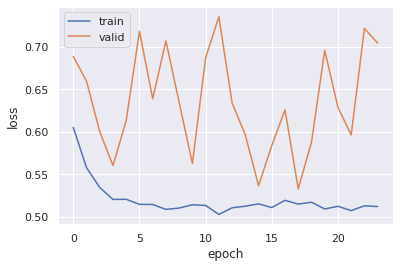

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

As evidenced above, a learning rate of 0.01 seems to be too large causing large jumps in losses.

**Plotting Confusion Matrix**

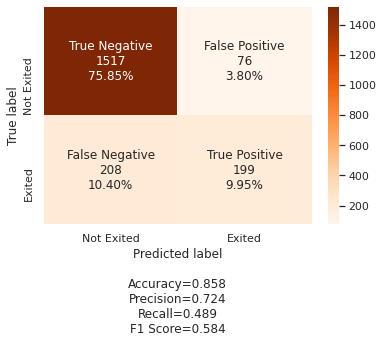

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

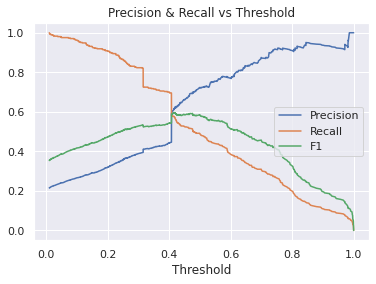

ROC Area Under Curve Score: 0.72


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

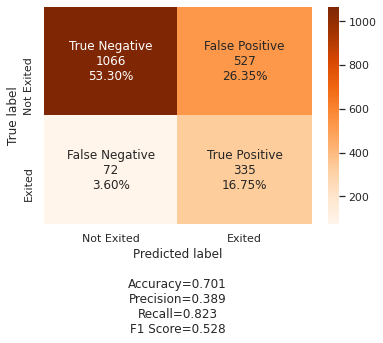

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.3 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 14", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

This model is not performing strongly.  Next we will choose a learning rate in between our initial and latest learning rate.

## Model 15 - Adam Learning Rate

Our new learning rate is 0.005, or the average of the previous learning rates.

In [ ]:
model15 = Sequential() # Initializing empty model

model15.add(Dense(units=20, activation="relu", kernel_initializer="he_normal", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model15.add(Dropout(0.5))                                          # Adding dropout to prevent overfitting
model15.add(Dense(units=10, kernel_initializer="he_normal", activation="relu"))                    # Adding second hidden layer
model15.add(Dropout(0.5))                                          # Adding dropout to prevent overfitting
model15.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model15.compile(optimizer=Adam(learning_rate=0.005), loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model15.fit(x=x_train_res, y=y_train_res, batch_size=8, epochs=24, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model15

Epoch 1/24
1274/1274 [==============================] - 3s 2ms/step - loss: 0.6388 - accuracy: 0.6368 - val_loss: 0.7660 - val_accuracy: 0.4635
Epoch 2/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5718 - accuracy: 0.6885 - val_loss: 0.7062 - val_accuracy: 0.5357
Epoch 3/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5325 - accuracy: 0.7278 - val_loss: 0.6088 - val_accuracy: 0.6334
Epoch 4/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5234 - accuracy: 0.7352 - val_loss: 0.6313 - val_accuracy: 0.6637
Epoch 5/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5140 - accuracy: 0.7451 - val_loss: 0.5813 - val_accuracy: 0.6809
Epoch 6/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5134 - accuracy: 0.7470 - val_loss: 0.6330 - val_accuracy: 0.6699
Epoch 7/24
1274/1274 [==============================] - 2s 2ms/step - loss: 0.5127 - accuracy: 0.7539 - val_loss: 0.6199 - val_accuracy:

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 20)                240       
_________________________________________________________________
dropout_22 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_23 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 11        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

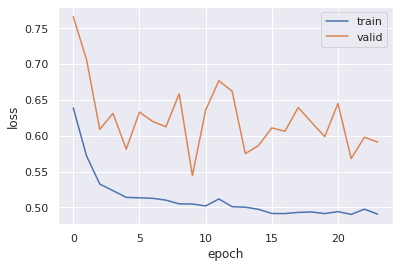

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

The validation losses still include dramatic spikes.  This learning rate is too large as well.

**Plotting Confusion Matrix**

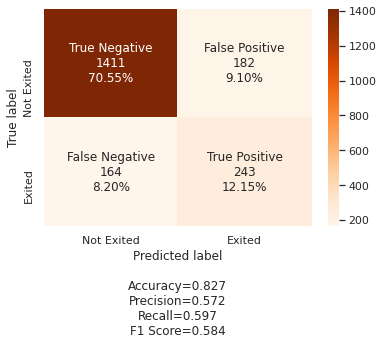

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

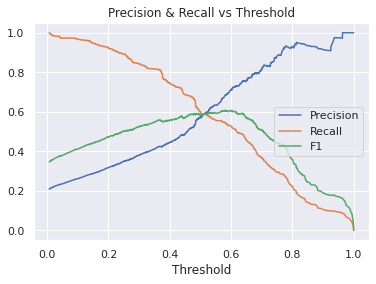

ROC Area Under Curve Score: 0.74


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

A threshold of 0.3 is still a solid choice for this model.

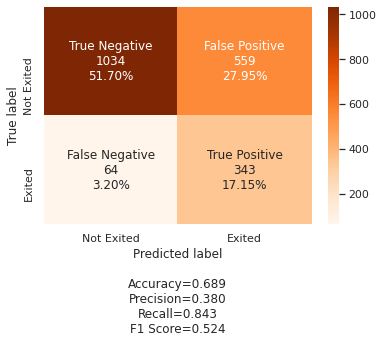

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.3 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 15", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

## Model 16 - Adam Learning Rate

Our new learning rate is 0.0008, or 20% lower than our initial learning rate.

In [ ]:
model16 = Sequential() # Initializing empty model

model16.add(Dense(units=20, activation="relu", kernel_initializer="he_normal", input_shape=(11,))) # Adding the first hidden layer, number of inputs equals number of dependent features
model16.add(Dropout(0.5))                                          # Adding dropout to prevent overfitting
model16.add(Dense(units=10, kernel_initializer="he_normal", activation="relu"))                    # Adding second hidden layer
model16.add(Dropout(0.5))                                          # Adding dropout to prevent overfitting
model16.add(Dense(units=1, activation="sigmoid"))                  # Adding output layer, "sigmoid" and 1 unit to do binary classification

model16.compile(optimizer=Adam(learning_rate=0.005), loss="binary_crossentropy", metrics=["accuracy"])  # Adding optimizer, loss, and metrics to keep track of

model16.fit(x=x_train_res, y=y_train_res, batch_size=8, epochs=24, validation_split=0.2, shuffle=True)  # Fitting the model to the data, using some training data for validation

# Grabbing the current model to lessen rewriting of code
currentModel = model16

Epoch 1/24
1274/1274 [==============================] - 3s 2ms/step - loss: 0.6454 - accuracy: 0.6451 - val_loss: 0.7884 - val_accuracy: 0.3791
Epoch 2/24
1274/1274 [==============================] - 2s 1ms/step - loss: 0.5637 - accuracy: 0.7065 - val_loss: 0.6576 - val_accuracy: 0.5683
Epoch 3/24
1274/1274 [==============================] - 2s 1ms/step - loss: 0.5451 - accuracy: 0.7253 - val_loss: 0.6811 - val_accuracy: 0.6087
Epoch 4/24
1274/1274 [==============================] - 2s 1ms/step - loss: 0.5339 - accuracy: 0.7363 - val_loss: 0.7035 - val_accuracy: 0.5526
Epoch 5/24
1274/1274 [==============================] - 2s 1ms/step - loss: 0.5171 - accuracy: 0.7440 - val_loss: 0.5639 - val_accuracy: 0.6476
Epoch 6/24
1274/1274 [==============================] - 2s 1ms/step - loss: 0.5124 - accuracy: 0.7479 - val_loss: 0.6190 - val_accuracy: 0.6323
Epoch 7/24
1274/1274 [==============================] - 2s 1ms/step - loss: 0.5104 - accuracy: 0.7542 - val_loss: 0.6062 - val_accuracy:

In [ ]:
# Printing number of training parameters for the current model
currentModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


**Plotting the train and validation loss**

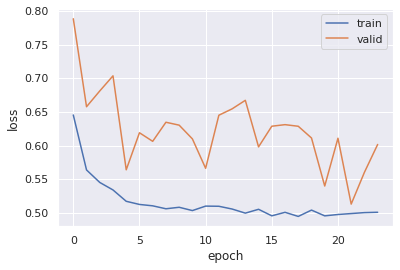

In [ ]:
# Capturing the train and validation loss
hist = pd.DataFrame(data=currentModel.history.history)
hist["epoch"] = currentModel.history.epoch

# Plotting accuracy at different epochs
sns.lineplot(x="epoch", y="loss", data=hist)
sns.lineplot(x="epoch", y="val_loss", data=hist)
plt.legend(("train", "valid"))
plt.show()

The spikes have been lessened.  Let us see how our model performs on the testing data.

**Plotting Confusion Matrix**

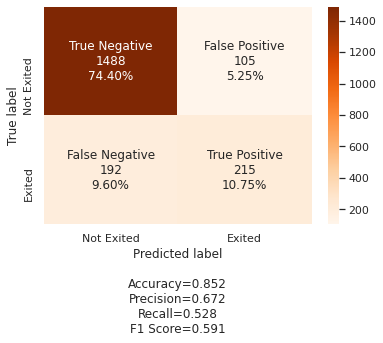

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.5 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

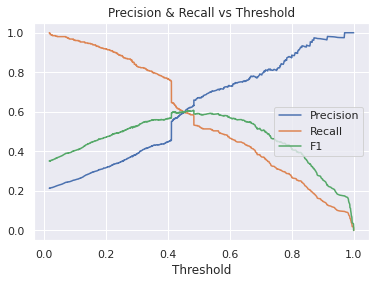

ROC Area Under Curve Score: 0.73


In [ ]:
# Calculating precision and recall for all thresholds between zero and one
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=currentModel.predict(x=x_test))

# Calculating F1 scores for all thresholds
f1 = 2*(precision*recall)/(precision+recall)

# Adding 1 to the final threshold to match with the other lists
thresholds = np.append(thresholds, 1)

# Plotting presion, recall and F1 vs threshold
sns.lineplot(x=thresholds, y=precision, label="Precision")
sns.lineplot(x=thresholds, y=recall, label="Recall")
sns.lineplot(x=thresholds, y=f1, label="F1")
plt.legend(loc="center right")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.show()

# Printing the ROC Area under curve score, the closer to one the better
print("ROC Area Under Curve Score:", round(roc_auc_score(y_true=y_test, y_score=y_pred), 2))

A threshold of 0.25 looks to be the best choice for this model giving us a good recall score and not completely terrible precision.

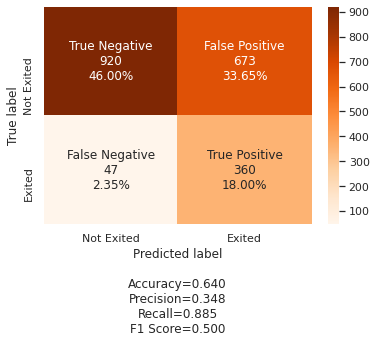

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = 0.25 # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

In [ ]:
dfModelPerformance = dfModelPerformance.append({"Model Name": "Model 16", "Accuracy": accuracy_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred), "F1": f1_score(y_test, y_pred), "Threshold": tHold}, ignore_index=True)
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

NameError: ignored

Decreasing the learning rate has yielded the best recall score and a slightly higher precision score than Model 11 as well.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Best Threshold=0.358257, G-Mean=0.764


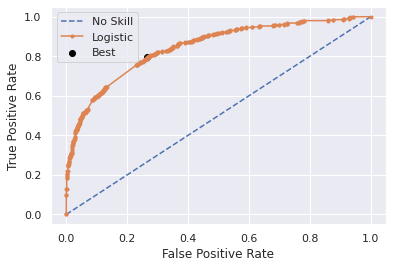

In [ ]:
# predict probabilities
yhat = model16.predict_proba(x_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

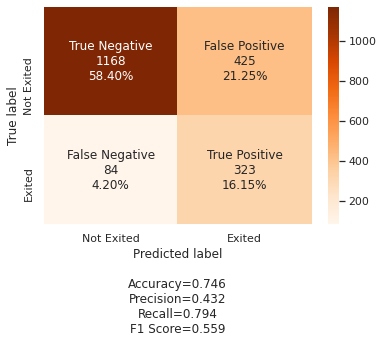

In [ ]:
# Confusion matrix on unseen test set

y_pred = currentModel.predict(x=x_test)
tHold = thresholds[ix] # Setting the threshold for what probability is considered a 1

for i in range(len(y_test)):
  if y_pred[i] > tHold:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

# Plotting the confusion matrix using the custom formula
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories)

# Final Model Performance Evaluation and Conclusion

In [ ]:
dfModelPerformance.style.highlight_max(subset=pd.IndexSlice[:,"Recall"], color="lightgreen")

Model 16 ended with the highest recall score of all of our models.  However, this is at the cost of precision.  The model includes two hidden layers with 20 nodes in the first and 10 nodes in the second.  The activation function utilized is Relu.  The optimizer function is Adam with a learning rate of 0.0008.

Model 16 will be considered our best model as it is able to successfully identify customers who will exit the bank.  This comes as the cost of falsely predicting customers as likely to exit when in fact they will stay with the bank.  Depending on the exact costs associated with the loss of a customer versus the advertising cost of trying to keep customers who will already stay with the bank the threshold of this model could be adjusted.

Customers who have the following traits are more likely to exit:
- Age around 50 (weaker predictor)
- Have three or four products (strong predictor)
- Are not active members (medium predictor)
- Live in Germany (medium predictor)
- Are female (weaker predictor)